In [1]:
%matplotlib inline

In [2]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 

sns.set()
warnings.filterwarnings('ignore')

In [20]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))


IndentationError: unexpected indent (<ipython-input-20-fffcb72b2154>, line 4)

 <h1> 
    <font size="5" face = "Times New Roma" color='#270336'>
    Binary Logistic Regression
    </font>
</h1>

<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" >
    </a>
    <font face = "Times New Roma" size="4"  color='#270336'>
        author: daodeiv (David Stankov) 
    </font>
</p>      
</h2>   

<h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <li><a href='#abstract'>Abstract </a> </li> <br>
      <!--<li><a href='#int-1'>Introduction </a> </li><br> -->
      <li><a href='#sigmoid'>The origin of sigmoid</a> </li><br>
       <li><a href='#cross'>Cross-entropy function </a> </li> <br>
       <li><a href='#minimization'>Minimization of Cross-entropy function </a> </li><br>  
        <li><a href='#gradient'>Gradient descent</a> </li><br>  
        
</ul>    
 </font>
  </h6>



<font size="1" id="abstract">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; Abstract</h2>
<br>
<font face = "Times New Roma" size="4.5"  color='#270336' style="margin-right: 45px; margin-left: 45px" >
  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; ... </font> <br>

<h5 id="int-1" style="margin-right: 45px; margin-left: 45px">
<font face="Times New Roma" size="4" color='#270336' >
      &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;BLA BLA
    </font>
</h5>        

<font size="1" id="sigmoid">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; The origin of sigmoid</h2>

<br> 
<font  size="4" color='#270336' face = "Times New Roma">
  &nbsp;&nbsp;&nbsp;&nbsp;   Odds ratio is is the probability to occur some event dividen to probability to not occur .It is defined by </font> <br>
  
<font size="5" color='#4a3e20'>    
    $$1) \; \; \; odds = \frac{P(A)}{1-P(A)} $$ 
</font>    
<font  size="4" color='#270336' face = "Times New Roma">    
 because the probability to something not hapening is $1-P(A)$
    how loog like this function ,as we know that the $P(A)\in [0,1]$
    the function look like this 
    
</font>    

Text(0.5, 0, '$odds(p(A))$')

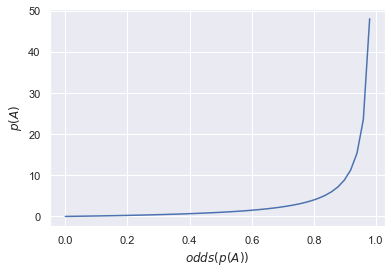

In [9]:
p = np.linspace(0,1)
odds = p/(1-p)
plt.plot(p,odds)
plt.ylabel(r'$p(A)$')
plt.xlabel(r'$odds(p(A))$')

<font size="4" color='#270336' face = "Times New Roma">  
 We can see from above graphic that a function is not symetric and the probability to something occur is between $[1,\infty]$ and to not occur $[0,1]$

We can transform it in other function which basically will not change the meaning of data , the data just is transformed but but relation between elements of data remain the same. The transformed data are much more convenient for our future desired results.Basically, This is a mathematical convenienience. <br> <br>
This new function is called log odds function which is achieved by applying the $log$ to the both sides of eq(1), mathematically look like this : <br>  
 </font>   
<font size="5" color='#4a3e20'>
 $$ 2) \; \; log\Big(\frac{P(A)}{1-P(A)}\Big) $$ 
 </font>

Text(0.5, 0, '$logOdds(p(A))$')

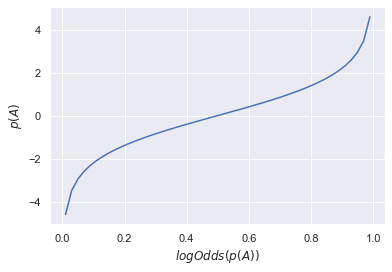

In [11]:
p = np.linspace(0.01,0.99)
odds = p/(1-p)
plt.plot(p,np.log(odds))
plt.ylabel(r'$p(A)$')
plt.xlabel(r'$logOdds(p(A))$')


<font size="4" color='#270336' face = "Times New Roma">  
        The main important fact of above graphics is that the log-odds varies between $[-\infty:\infty]$.
        This fact make it the convininet to be use for a fiting with given data withod limnit.
        The main point of logistic regression begin with the assumption of that : <br>
</font>
   <br>
<font size="5" color='#4a3e20'>
     $$ 3) \; \; log(\frac{p}{1-p}) = \beta_i x_i +a  $$ 
<font>
  

<h1>
 <font size="5" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$e^{log(\frac{p}{1-p})} = e^{\beta_i x_i +a}$ 
  </font>
</h1>     

<h1>
 <font size="5" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;$ \Rightarrow \frac{p}{1-p} = e^{\beta_i x_i +a}$
 </font>
</h1> 

<h1>
 <font size="5" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;$ \Rightarrow p = e^{\beta_i x_i +a}(1-p)$
 </font>
</h1> 

<h1>
 <font size="5" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;$ \Rightarrow p = e^{\beta_i x_i +a} + -p.e^{\beta_i x_i +a} $
 </font>
</h1> 

<h1>
 <font size="5" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;$ \Rightarrow p(1 +e^{\beta_i x_i +a}  ) = e^{\beta_i x_i +a} $
 </font>
</h1> 

<h1>
 <font size="5" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;$ \Rightarrow p= \frac{e^{\beta_i x_i +a}}{(1 +e^{\beta_i x_i +a}  ) } $
 </font>
</h1> 

<h1>
 <font size="5" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;$ \Rightarrow p= \frac{ (e^{\beta_i x_i +a})e^{-(\beta_i x_i +a}) }{(1 +e^{\beta_i x_i +a}  )e^{-(\beta_i x_i +a}) }$
 </font>
</h1> 

<h1>
 <font size="5" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;$ \Rightarrow p= \frac{1}{1 +e^{-(\beta_i x_i +a)}  }$
 </font>
</h1> 

<h1>
 <font size="5" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;$ \Rightarrow p= \frac{1}{1 +e^{-(\beta_i x_i +a)}  }$
 </font>
</h1> 

<h1>
 <font size="5" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;$ \Rightarrow p= \frac{1}{1 +e^{-z}  } $
 </font>
</h1> 
<h5 style="margin-right: 50px; margin-left: 160px">
<font face="Times New Roma" size="3" color='#270336' >
       where    $z=\beta_i x_i +a$ 
    </font>    
</h5>    

<font size="4" color='#270336' face = "Times New Roma">  
     We successfully achieved the sigmoid by a suggestion of $log-odds$ represent a linear function (basically that is the starting point of binary logistic regresssion) following by basics algebraic manipulation over it.Since there is a linear equation in our supposing ,this makes it enough simple in optimization process intending to fit the estimators according to given data, or just using for machine learning classification problem. The estimator  is a vector :  $$z=x_n\theta_n+ ...x_1+\theta_1 +\theta_0$$ .
     <br>
        In addition we can see the sigmoid functi with different estimators :   
    </font>        

In [16]:
def cartesian(start,end,step):
    x = y = np.linspace(start,end,step)
    result = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
            
    return result  
def sigmoid(x,a,b):
    z = [i*a +b for i in x]
    result = [1/(1+np.exp(-i)) for i in z ]
    return result
def plot(num):
    """
    
    """
    
    size = np.sqrt(num)  
    a = cartesian(1,100,num)
  
    x = np.linspace(-10,10,30)
    if not size.is_integer():
        raise ValueError("num must has precise  root of integer type ")
    size = int(size)
    fig, axs = plt.subplots(size, size,figsize=(25,25))    
    for i in range(size):
        for j in range(size):
            axs[i, j].set_title('a = {} ,b = {}'.format(i,j)  )
            y=sigmoid(x,10*i,j*10)
            axs[i, j].plot(x,y)

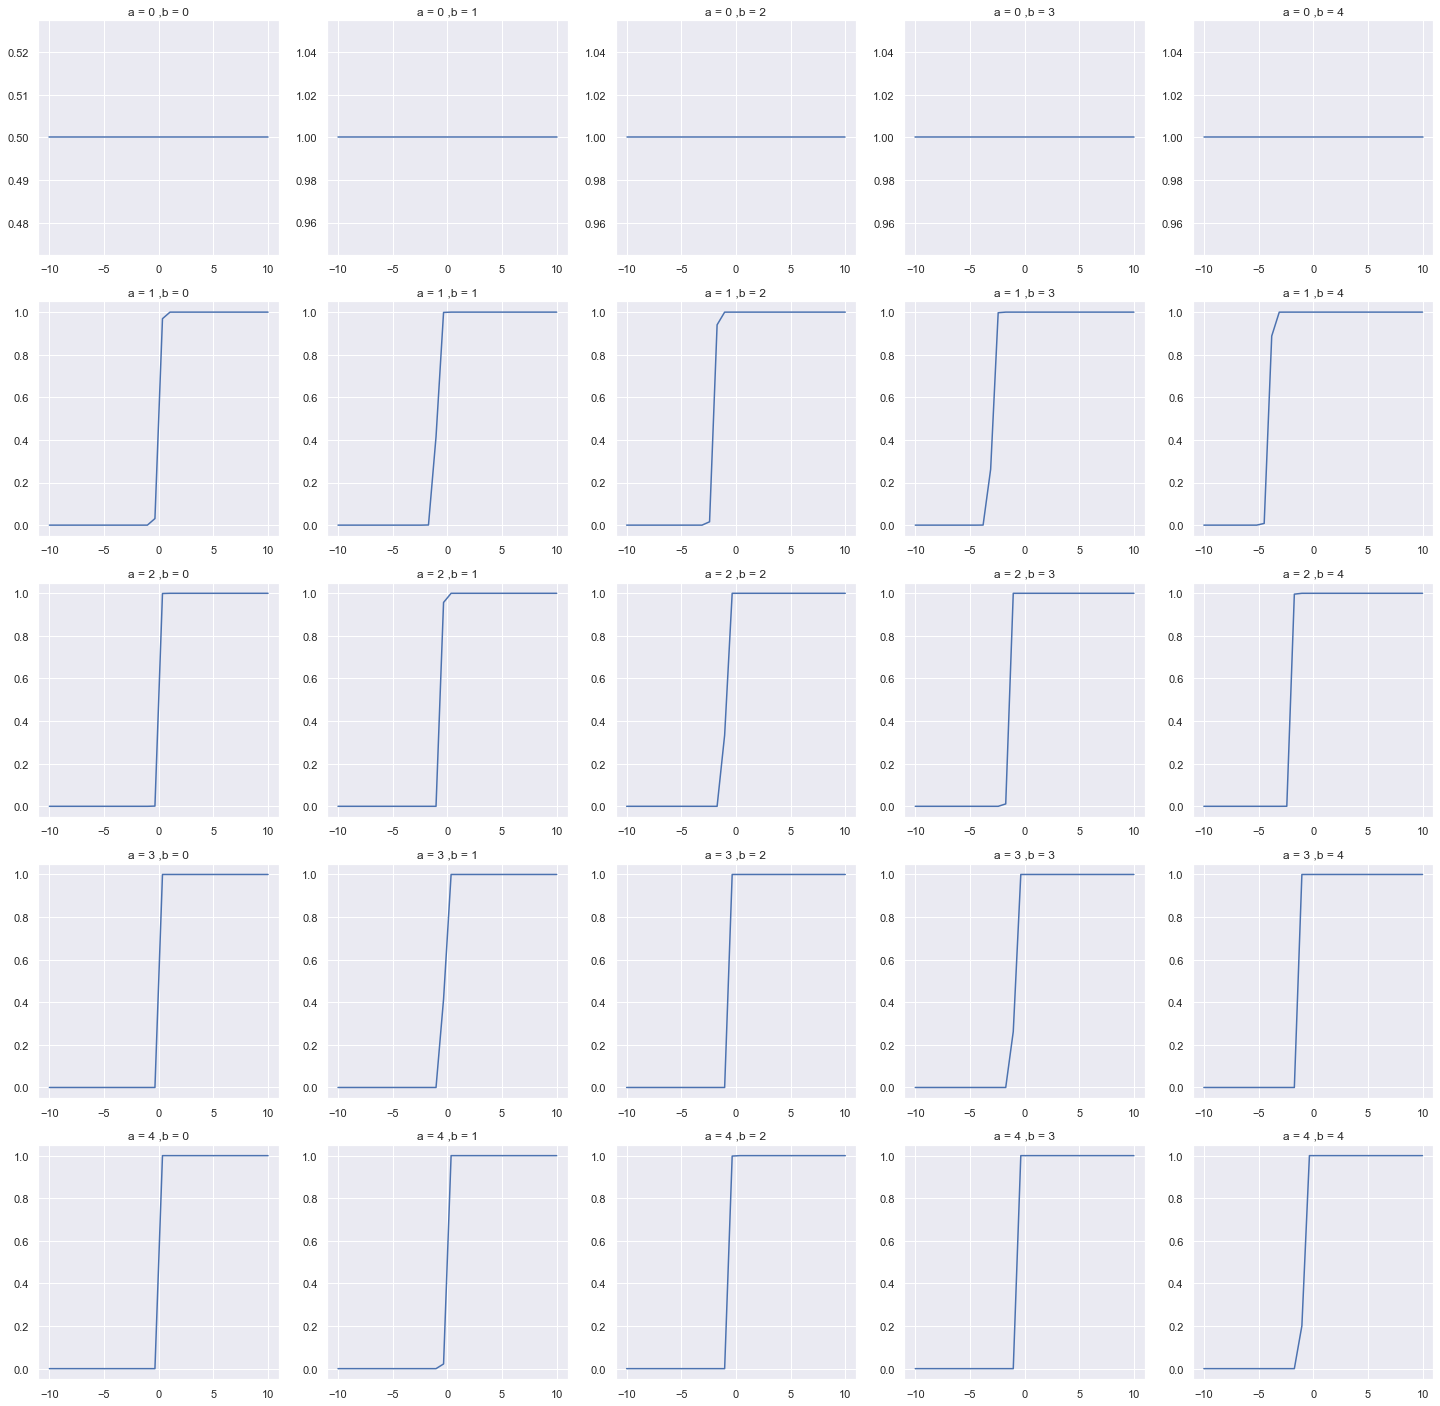

In [17]:
plot(25)


<font size="1" id="cross">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp;Cross-entropy function </h2>


<font size="4" color='#270336' face = "Times New Roma">  
The most important property is that the sigmoid transforms every variable belongs $x\in [- \infty,\infty]$ into variable 
belongs to interval $y\in [0,1]$. <br>
That property makes the sigmoid function extremely convenient function for binary classification problems.<br>
The logistic regression deals with finding the best parameters $\Theta s = \Theta_0,\Theta_1,..,\Theta_m $ according to given data using some appropriative Loss function.     
        
The loss function for sigmoid look likes this:        
 

</font>
<font size="5" color='#4a3e20'>  
$$ (1) \; \;  Loss(h_{\Theta}(x),y) = \Bigg( \begin{matrix}  -log(h_{\Theta}(x)) && if\; y=1 \\log( 1 - h_{\Theta}(x)) && if\; y=0\end{matrix}\Bigg)  $$ 
    </font> 
</h7>


No handles with labels found to put in legend.


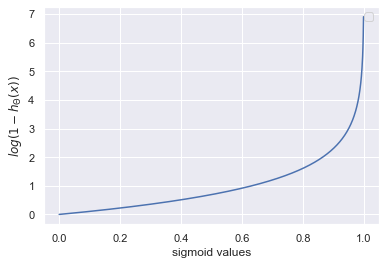

No handles with labels found to put in legend.


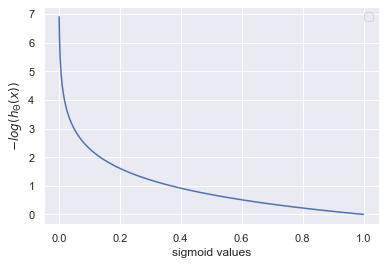

In [21]:
def sigmoid(w,b,range=10):
    """
    
    """
        
    f = lambda x : 1/(1+np.exp(-x))
    x = np.linspace(-range,range)
    x = np.array([x,x]).T
    z = np.array( [ np.array(w).dot(i)+b for i in x])
    result = np.array([f(i) for i in z])
    return z,result

def error_0(x):
       return  -np.log(1-x)
    
def error_1(x):
      return -np.log(x)
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values))
plt.xlabel('sigmoid values')
plt.ylabel(r'$log(1 - h_{\Theta}(x))$')
plt.legend()
plt.show()
plt.plot(sigmoid_values, error_1(sigmoid_values))
plt.ylabel(r'$-log(h_{\Theta}(x))$')
plt.xlabel('sigmoid values')
plt.legend()
plt.show()

<font size="4" color='#270336' face = "Times New Roma">  
   The eq.(1) can be written in more compact form :      
   </font>  

<font size="5" color='#4a3e20'>  
    $$ Loss(h_{\Theta}(x),y) = -y.log(h_{\Theta}(x)) - (y-1)log(1 - h_{\Theta}(x))$$ 
</font>   
 

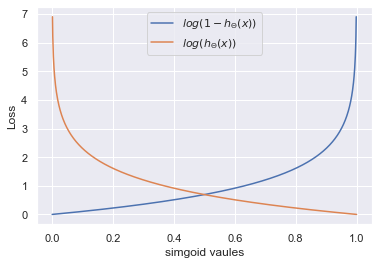

In [22]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values), label = r'$log(1 - h_{\Theta}(x))$')
plt.xlabel('simgoid vaules')
plt.ylabel('cost')
plt.legend()
plt.plot(sigmoid_values, error_1(sigmoid_values), label = r'$log(h_{\Theta}(x))$')
plt.xlabel('simgoid vaules')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font size="4" color='#270336' face = "Times New Roma">  
    The above graphic is called a cross-entropy function. <br>
    Before we are going to get a meaning of function using graphics we will see other interpretations of cross-entropy also known as Log-Likelihood coming from probabilistic theory. <br> <br>
    Let us regard  the value of $h_{\Theta}(x)$ as probability: <br>
</font>
<font size="5" color='#4a3e20'>  
        $$ \begin{matrix}
P(y=1|x,\Theta) = h_{\Theta}(x)  \\
P(y=1|x,\Theta) = 1-h_{\Theta}(x)
\end{matrix}\;\; =\; P(y|x;\Theta)=h_{\Theta}^y(1-h_{\Theta}(x))^{1-y}$$ 
</font>
<br>
<font size="4" color='#270336' face = "Times New Roma">  
So the likehood is:
</font>    
<font size="5" color='#4a3e20'>  
    $$L(\Theta) = p(y|X;\Theta) = $$ <br>
    $$\;\;\;\;\;\;\;\;\;\;\;= \prod_{i=1}^{m}p(y^{(i)}|x^{(i)};\Theta) $$
    $$\;\;\;\;\;\;\;\;\;\;\;= \prod_{i=1}^{m}h_{\Theta}(x^{(i)})^{y^{i}}(1-h_{\Theta}(x))^{1-y^{(i)}}$$
   And the log likehood:
      $$ log(L(\Theta))=\sum_i^my_i.log(h_{\Theta}(x_i)) + (y_i-1)log(1 - h_{\Theta}(x_i))$$
</font>      
<font size="4" color='#270336' face = "Times New Roma">  
   The above euation is called likelihood or cross entropy.<br>
   Likehood is use for  Cost function in Logistic regression.
</font>  


<font size="5" color='#4a3e20'>  
  $$ (2) \; \;J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (y_i-1)log(1 - h_{\Theta}(x_i))\big)$$
  </font>
<font size="4" color='#270336' face = "Times New Roma">  
Let make an attempt to understand why the minimization of the above equation could be succesfuly use to find the best parameters $\theta_i $ 

   </font>


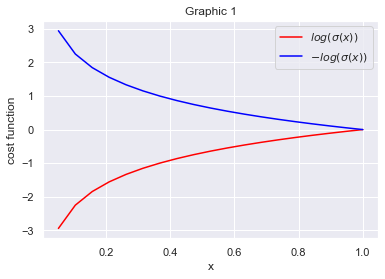

Text(0.5, 1.0, 'Graphic 2')

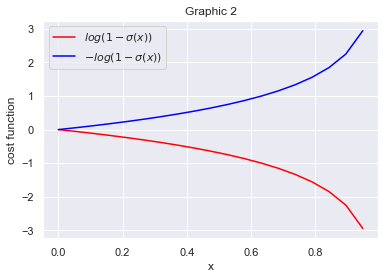

In [23]:
x = np.linspace(0,1,20)
y = np.log(x)
y1 = -np.log(x) 

plt.plot(x,y,color='red',label=r'$log(\sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(\sigma(x))$')
plt.xlabel("x")
plt.ylabel("cost function")
plt.title('Graphic 1')
plt.legend()
plt.show()

y = np.log(1-x)
y1 = -np.log(1-x) 

plt.plot(x,y,color='red',label=r'$log(1- \sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(1- \sigma(x))$')
plt.xlabel("x")
plt.ylabel("cost function")
plt.legend()
plt.title('Graphic 2')

<font size="4" color='#270336' face = "Times New Roma">  
  How we can find the min entropy ? What does mean min entropy ?

   </font>


<font size="4" color='#270336' face = "Times New Roma">  
from  graphic 1 we can see :
</font>
  <font size="5" color='#4a3e20'>  
  $$ (3) \; \; \; x \to 1 \; then \; -log(\sigma(x)) \to 0 $$ 
  $$ (4) \; \; \; x \to 1 \; then \; -log(\sigma(x)) \to 0 \;    $$
  <br> <br>
   $$(5) \; \; \;x \to 0 \; then \; log(\sigma(x)) \to \infty $$
  $$ (6) \; \; \;x \to 0 \; then \;  -log(\sigma(x)) \to -\infty $$ </br>
</font>
<font size="4" color='#270336' face = "Times New Roma">  
From eq. (3) we could conclude that when we have to fit the estimators($\theta_i$) values to label(target) ones which take value either 1 or 0 then eq. $-log(\sigma(x))$must minimize.<br> 
        In such a way, the min error(min loss) which refer to min-entropy will be achieved in case when the target value is equal to 1. <br>
        if we use eq.(4) we have to  maximize a $log(\sigma(x))$ this will give the min-entropy and min error as well but $log(\sigma(x))$ has not a closed-form, therefore the finding the extremums is a difficult task.When the target value is 0 the both functions $log(1−σ(x)),−log(1−σ(x))$ are useless, because they tend to infinity  $−log(1−σ(x)),−log(1−σ(x))→+−∞$ and  $error→+−∞$  and entropy do the same , since they also have a closed-form
  </font>

<font size="4" color='#270336' face = "Times New Roma">  
from  graphic 2 we can see :
</font>
<font size="5" color='#4a3e20'>  
 $$ (7) \; \; \; x \to 1 \; then \; -log(1-\sigma(x)) \to -\infty $$ 
  $$ (8) \; \; \; x \to 1 \; then \; -log(1-\sigma(x)) \to \infty;    $$ <br> <br><br>
    $$(9) \; \; \;x \to 0 \; then \; \;log(1-\sigma(x)) \to 0 $$
  $$ (10) \; \; \;x \to 0 \; then \; \; -log(1-\sigma(x)) \to 0 $$ </br>
</font>
<font size="4" color='#270336' face = "Times New Roma">  
The above thoughts can be taken into account for eq. (7)(8)(9)(10) as well, but with the opposite logic, when the target value is equal to 0 then  the best choice is $-log(1-\sigma(x))$ because it has closed-form tends to 0 not to infinity. <br> <br>
   
   We've assumed that why the minimization of eq (2) will give the min error equivalented to min-entropy.
  </font>
</h7>    

<font size="4" color='#270336' face = "Times New Roma">  
  In briefly, we saw why the function  $-log(\sigma(x))$ can be use for cost-error when the  target value is equal to 1 and  $-log(1-\sigma(x))$ for a target value is equal to 0and how both elegantly could be part of one  equation. <br> <br>
        
 </font>
<font size="5" color='#4a3e20'>  
        $$ Cost(h_{\Theta}(x),y) = -y.log(h_{\Theta}(x)) - (y-1)log(1 - h_{\Theta}(x))$$ 
   </font>  
       
       


<font size="4" color='#270336' face = "Times New Roma">  
        The next step is how we can minimize: $$ Cost(h_{\Theta}(x),y)$$ where <br> 
 </font>   
 <font size="5" color='#4a3e20'>  
        $$ h_{\theta(x)}=\sigma(\vec{\theta}.\vec{x})=\frac{1}{1+e^{\vec{\theta}.\vec{x}}}=\frac{1}{1+e^{z}}$$ <br>  <br>
 </font>       
<font size="4" color='#270336' face = "Times New Roma">  
        in order   to   find the best estimators  $\vec{\Theta} = [\theta_n ,..., \theta_1 ,\theta_0]$
    </font>
</h7>  


<font size="1" id="minimization">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp;Minimization of Cross-entropy function </h2>

<br>
<h7>
<font size="4" color='#270336' face = "Times New Roma">  
   Let's dive into mathematics behind minimization of cross-entropy.<br><br>
We will use the well known Gradient denscent for minimization in order to find:
 </font>    
<br> <br>
<font size="5" color='#4a3e20'>      
$$\frac{\partial J(\Theta)}{\partial x_i}$$
 <br> <br>
    </font>
<font size="4" color='#270336' face = "Times New Roma">      
    
   where 
 </font>   
<font size="5" color='#4a3e20'>      
          $$ J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (1-y_i)log(1 - h_{\Theta}(x_i))\big)$$
              
 </font>
         

<font size="4" color='#270336' face = "Times New Roma">  
     First, let to find some derivatives of function that are from an ultimate need.
</font>

<font size="5" color='#4a3e20'>     
  $(1)\;\;\;\;\; \frac{\partial h_{\Theta(z)}}{\partial x_i } = \frac{d h_{\Theta(z)}}{dz}.\frac{\partial z}{\partial x_i}  $
  <br> <br>
  $(2)\;\;\;\;\; \frac{d h_{\Theta(z)}}{dz} = \frac{\frac{1}{1+e^{-z}}}{dz}$
  
  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;= \frac{e^{-z}}{(1+e^{-z})^2}$
   <br>
  
   
  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{1}{1+e^{-z}}(1 -\frac{1}{1+e^{-z}} ) $ 
  <br> <br>
  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;= h_{\Theta}(z)(1 - h_{\Theta}(z))  $
  
  <br> <br>
  
  $ (3) \; \; \frac{d(log(h_{\Theta}(x_i)))}{dz} = \frac{1}{h_{\Theta}(z)}\frac{dh_{\Theta}(z))}{dz}$ <br>
 <br> <br>
 $by\; plugin \;the\; eq.\;(2)\;$ <br> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{1}{h_{\Theta}(z)} h_{\Theta}(z)(1 - h_{\Theta}(z))$ <br>


 <br> <br>

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=( 1 - h_{\Theta}(z) ) $
<br> <br> <br> <br>
$ (4)\;\;\;\;\; \frac{dlog(1 - h_{\Theta}(z))}{dz} = \frac{1}{(1- h_{\Theta}(z))}\frac{d(1-h_{\Theta}(z)))}{dz}$
<br> <bR>

$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \frac{1}{(1- h_{\Theta}(z))}\frac{-d(h_{\Theta}(z)))}{dz}$
 <br> <br>
 $by\; plugin \;the\; eq.\;(3)\;$ <br> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=-\frac{1}{(1-h_{\Theta}(z))} h_{\Theta}(z)(1 - h_{\Theta}(z)) $ <br> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=- h_{\Theta}(z)) $ 
   </font>

<font size="4" color='#270336' face = "Times New Roma">  
Let to find partial derivate of function  $J(\Theta)$ respect to $x_i$ <br>
 </font>

<font size="5" color='#4a3e20'>     
    <br>$(5) \; \; \dot{J}(\theta)_{\theta_i}=\frac{\partial J(\theta)}{\partial \theta_i} =   -\frac{1}{m}\sum_i^m\big(y_i \frac{\partial log(h_{\Theta}(z))}{\partial \theta_i}+  (1-y_i) \frac{\partial log(h_{\Theta}(z)-1)}{\partial \theta_i}\big) = $ <br> <br>
$-\frac{1}{m}\sum_i^m\big(y_i \frac{dlog(h_{\Theta}(z))}{dz}\frac{\partial z}{\partial \theta_i}+  (y_i-1) \frac{dlog(1- h_{\Theta}(z))}{dz}\frac{\partial z}{\partial \theta_i}\big)   $
</font>

<font size="4" color='#270336' face = "Times New Roma">  
appying  equations (3) (4) to (5)  we will achieve <br>
 </font>

<font size="5" color='#4a3e20'>     
    $(6)\;\dot{J}(\theta)_{.\theta_i}=-\frac{1}{m}\sum_i^m\big(y_i (1 - h_{\Theta}(z))\frac{\partial z}{\partial .\theta_i}+  (1-y_i) (- h_{\Theta}(z))\frac{\partial z}{\partial x_i})\big) $
    <br> <br>
$\;\;\;\;\;\;\;\;\;\;=-\frac{1}{m}\sum_i^m\big(y_i\frac{\partial z}{\partial x_i} -y_ih_{\Theta}(z))\frac{\partial z}{\partial \theta_i} +y_ih_{\Theta}(z))\frac{\partial z}{\partial \theta_i} - h_{\Theta}(z)\frac{\partial z}{\partial \theta_i})  $
<br> <br>
$\;\;\;\;\;\;\;\;\;\;= -\frac{1}{m}\sum_i^m \big(y_i \frac{\partial z}{\partial \theta_i} - h_{\Theta}(z)\frac{\partial z}{\partial \theta_i}\big) $
<br> <br>
$\;\;\;\;\;\;\;\;\;\;=  -\frac{1}{m}\sum_i^m \big(y_i  - h_{\Theta}(z)\big)\frac{\partial z}{\partial \theta_i}  $
<br> <br>
$where$
<br><br>    
$ (7) \;\frac{\partial z}{\partial \theta_i}=\frac{\partial \theta_n x_n + ...\theta_1 x_1+\theta_0}{\partial \theta_i } = x_i $ 
<br> <br>
$and \; \; for\;\; x_0=1\;\; \frac{\partial z}{\partial \theta_0} =1 $ <br>
<br>
$applying \;eq.(7) \;in \; eq.(6)\; we\; will\; achieve :$
 $$(8)\; \; \frac{\partial J(\theta)}{\partial \theta_i} =-\frac{1}{m}\sum_i^m \big(y_i - h_{\Theta}(z)\big )x_i $$
     
</font>


<font size="1" id="gradient">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp;Gradient descent</h2>


<font size="4" color='#270336' face = "Times New Roma">  
  Gradient descent algorithm using eq.(8) mathematically will be:
 </font>

<font size="5" color='#4a3e20'>     
$ 13) \; \; \theta_i = \theta_i - \frac{\partial J(\theta)}{\partial a} $ <br> <br>
<br> <br>
$\; \;\; \; \; \;\; \; \; = \theta_i - (-\frac{1}{m}\sum_i^m \big(y_i  - h_{\Theta}(z)\big )x_i)  $ <br>
<br> <br>
$\; \; \; \; \; \; \; \; = \theta_i - \frac{1}{m}\sum_i^m \big( h_{\Theta}(z) - y_i\big )x_i $ <br> <br>
</font>

<font size="4" color='#270336' face = "Times New Roma">  
        Our gradient descent algorithm is : 
     </font>

 <font size="5" color='#4a3e20'>  
      $$\theta_i = \theta_i - \frac{1}{m}\sum_i^m \big( h_{\Theta}(z) - y_i\big )x_i $$
  </font>
 
 <br>
<h1>
    <h3>
   <font size="4" color='#270336' face = "Times New Roma">  
        for intersept $\theta_0$ :
     </font>
</h3> 
  <h1>
 <font size="5" color='#4a3e20'>  
      $$\theta_0 = \theta_0 - \frac{1}{m}\sum_i^m \big( h_{\Theta}(z) - y_i\big )$$
  </font>